In [1]:
#importing libraries

import numpy as np
import keras
from keras import backend as K

Using TensorFlow backend.


In [2]:
#importing layers and models

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import  Dense,Flatten

In [3]:
#importing metrics and optimizers

from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Preparing Datasets

In [4]:
#setting path to directory

train_path = 'Datasets/train'
test_path ='Datasets/test'
valid_path ='Datasets/valid'

In [5]:
#setting batches separately

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['first_quality','second_quality','third_quality'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['first_quality','second_quality','third_quality'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['first_quality','second_quality','third_quality'],batch_size=4)

Found 83 images belonging to 3 classes.
Found 83 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


In [6]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f= plt.figure(figsize=figsize)
    cols =len(ims)//rows if len(ims)%2 ==0 else len(ims)//row +1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [7]:
imgs,labels =next(train_batches)

/home/yeswanth/.local/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


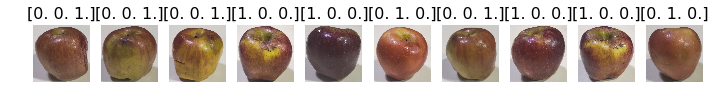

In [8]:
plots(imgs,titles = labels)

# Building CNN

# Using VGG16

In [9]:
vgg16_model =keras.applications.vgg16.VGG16()

In [11]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [80]:
my_model = Sequential()

In [81]:
# Freeze the layers except the last 4 layers
for layer in vgg16_model.layers:
    my_model.add(layer)
    #layer.trainable = False

AttributeError: Layer input_1 has multiple inbound nodes, hence the notion of "layer input" is ill-defined. Use `get_input_at(node_index)` instead.

In [82]:
my_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [83]:
my_model.layers[-1].trainable = False

In [84]:
for layer in my_model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f3f7f352438> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7f334278> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3f7f33de80> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7f381ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7ead1be0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3f7ea6fcc0> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7ead1f28> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7ea28240> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7ea4acf8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3f7e9dffd0> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7e9dfb00> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7e9b8240> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7e9b8da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3f7e972be0> False
<keras.layers.convolutional.Conv2D object at 0x7f3f7e972668> F

In [85]:
my_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [55]:
for layer in my_model.layers:
    layer.trainable=False
    

In [89]:
my_model.add(Dense(3,activation='softmax'))


/home/yeswanth/.local/lib/python3.6/site-packages/keras/engine/network.py:190: UserWarning: Sequential inputs must come from `keras.layers.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to your model was not an Input tensor, it was generated by layer input_1.
Note that input tensors are instantiated via `tensor = keras.layers.Input(shape)`.
The tensor that caused the issue was: input_1:0
  str(x.name))


AttributeError: Layer input_1 has multiple inbound nodes, hence the notion of "layer input" is ill-defined. Use `get_input_at(node_index)` instead.

In [74]:
my_model.pop()

AttributeError: Layer predictions has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.

In [90]:
my_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [91]:
my_model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

IndexError: list index out of range

In [ ]:
!pip3 install tf-nightly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 511.7 MB 2.0 kB/s eta 0:00:01     |██▊                             | 44.1 MB 3.3 MB/s eta 0:02:21     |███▎                            | 52.0 MB 2.9 MB/s eta 0:02:36     |████▎                           | 68.3 MB 3.5 MB/s eta 0:02:08     |████▌                           | 71.6 MB 3.5 MB/s eta 0:02:05     |██████▊                         | 108.1 MB 3.2 MB/s eta 0:02:06     |███████                         | 112.2 MB 2.8 MB/s eta 0:02:25     |███████                         | 113.1 MB 2.8 MB/s eta 0:02:24     |███████▏                        | 114.2 MB 3.2 MB/s eta 0:02:04     |███████▍                        | 117.9 MB 3.5 MB/s eta 0:01:53     |████████▍                       | 134.6 MB 2.0 MB/s eta 0:03:05     |█████████▊                      | 155.5 MB 2.7 MB/s eta 0:02:13     |██████████▎                     | 164.7 MB 2.7 MB/s eta 0:02:10     |██████████▉            

  Attempting uninstall: gast
    Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
